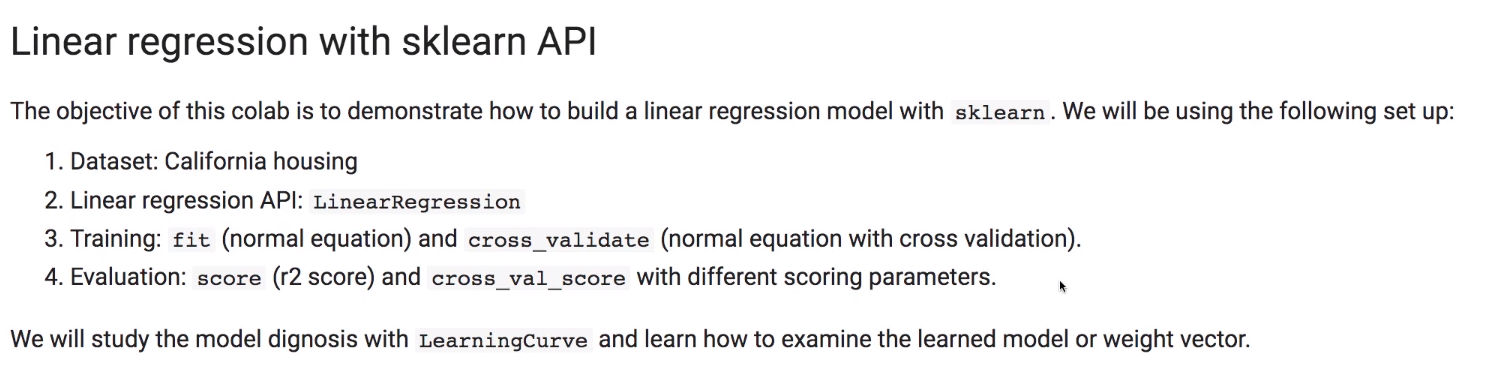

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
np.random.seed(306)
plt.style.use('seaborn')

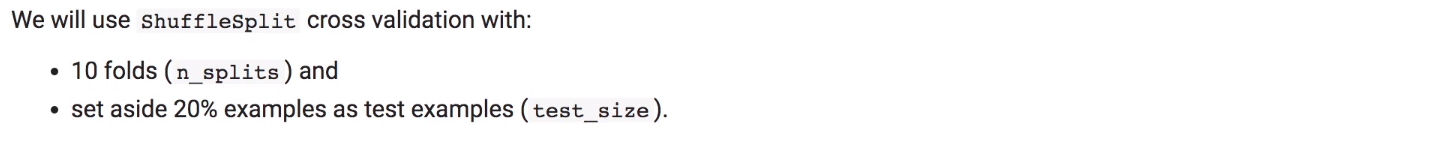

In [3]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

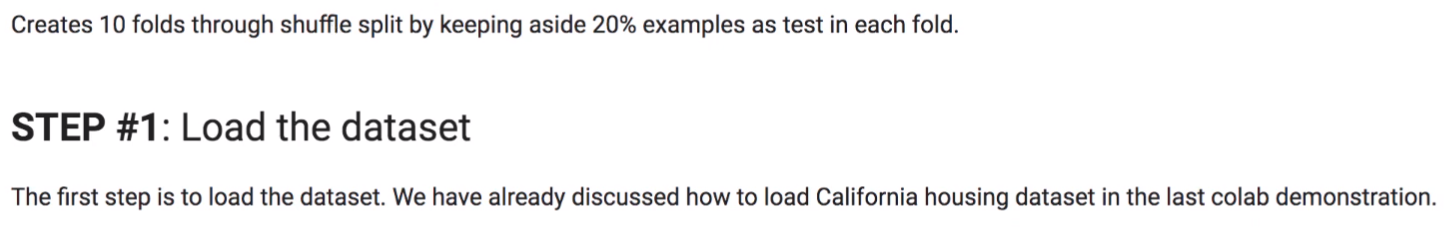

In [4]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
features

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

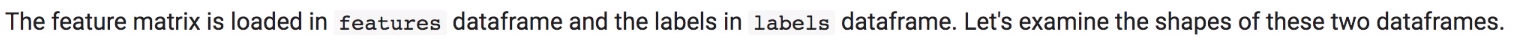

In [5]:
print('Shape of feature matrix:', features.shape)
print('Shape of label vector:', labels.shape)

Shape of feature matrix: (20640, 8)
Shape of label vector: (20640,)


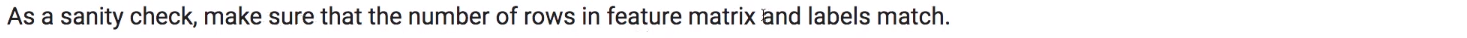

In [6]:
assert(features.shape[0] == labels.shape[0])

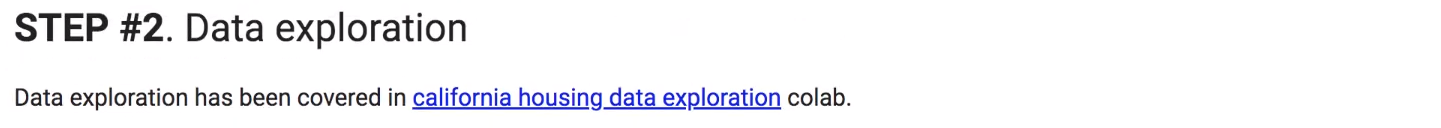

Covered in [Week_4a](Week_4a_Explore_California_Housing_Dataset.ipynb) notebook

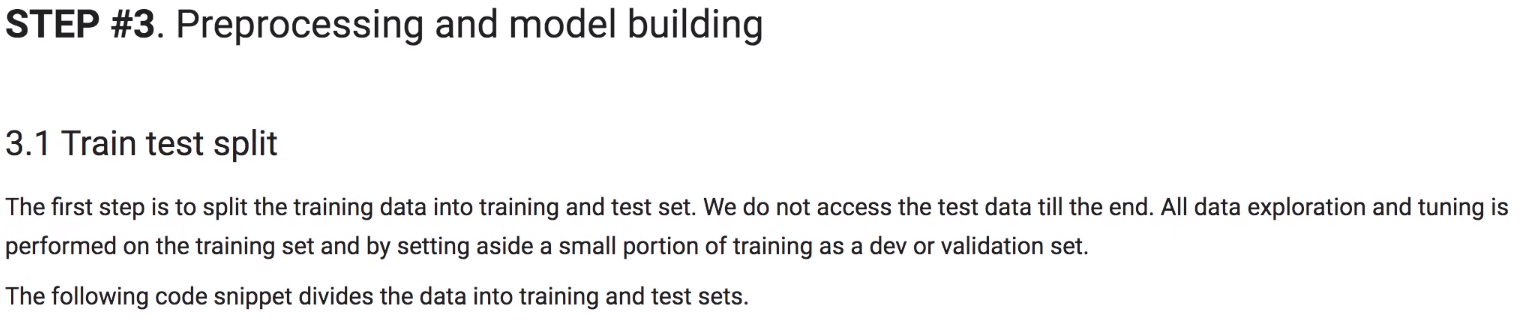


In [7]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=42)

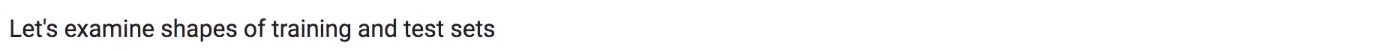

In [8]:
print('# training samples:', train_features.shape[0])
print('# test samples:', test_features.shape[0])

# training samples: 15480
# test samples: 5160


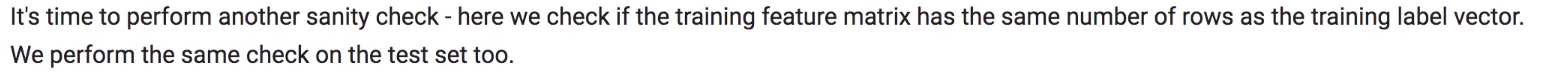

In [9]:
assert(train_features.shape[0] == train_labels.shape[0])
assert(test_features.shape[0] == test_labels.shape[0])

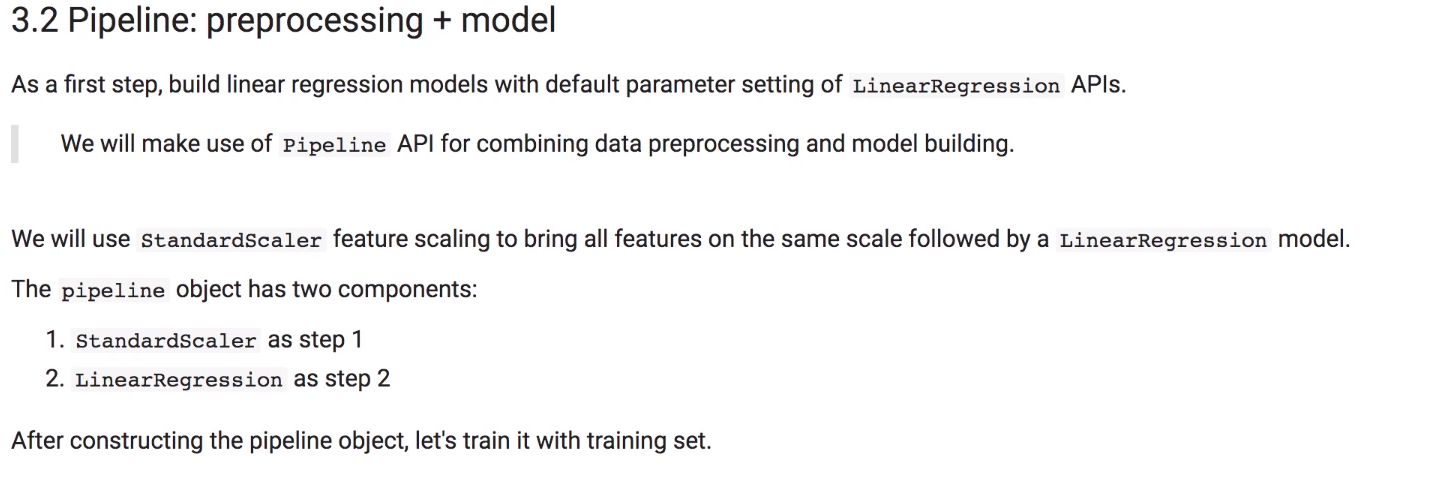

In [10]:
# set up the linear regression model
lin_reg_pipeline = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

# train linear regression model with normal equation
lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

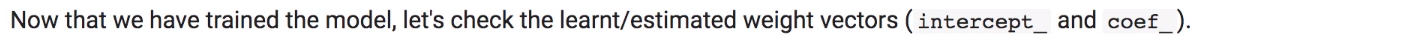

In [11]:
print('itercept (w_0):', lin_reg_pipeline[-1].intercept_)
print('weight vector (w_1, ..., w_m):', lin_reg_pipeline[-1].coef_)

itercept (w_0): 2.0703489205426377
weight vector (w_1, ..., w_m): [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


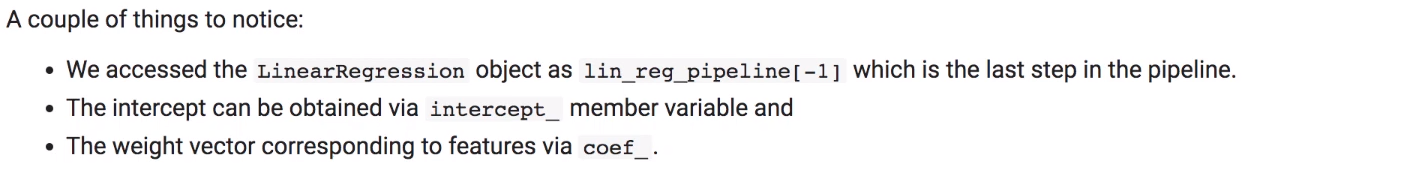
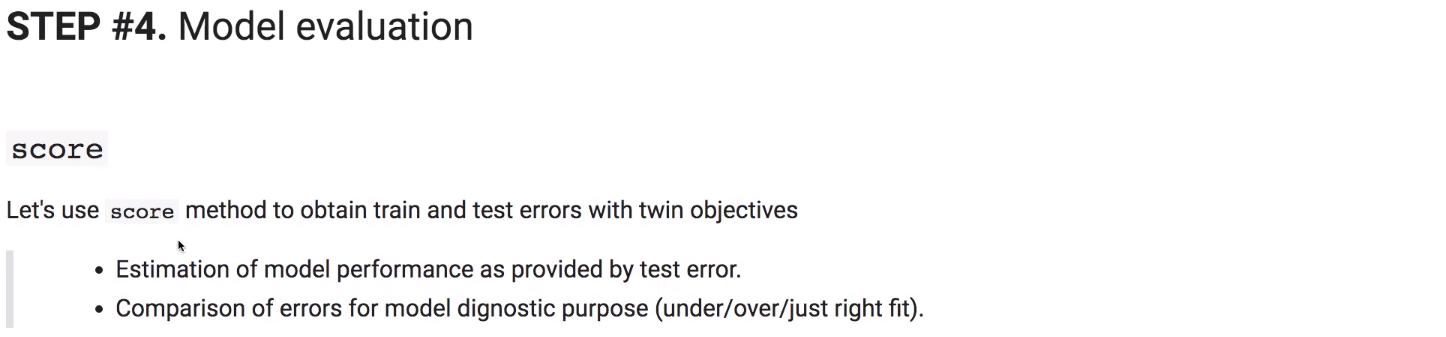

In [12]:
# evaluate model performance on the test set
test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model performance on the test set:', test_score)

train_score = lin_reg_pipeline.score(train_features, train_labels)
print('Model performance on the train set:', train_score)

Model performance on the test set: 0.5910509795491352
Model performance on the train set: 0.609873031052925


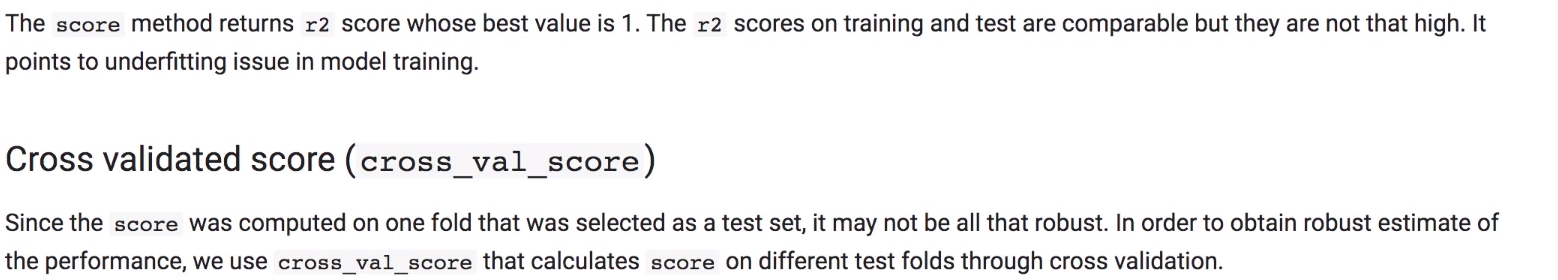

In [13]:
lin_reg_score = cross_val_score(lin_reg_pipeline,
                                train_features,
                                train_labels, 
                                scoring='neg_mean_squared_error',
                                cv=shuffle_split_cv
                               )

# This will return 10 different scores, one for each fold
print(lin_reg_score)

# We can take mean and standard deviation of the score and report it
print(f'\nScore of linear regression model on the test set:\n'
     f'{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}')


[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

Score of linear regression model on the test set:
-0.529 +/- 0.022


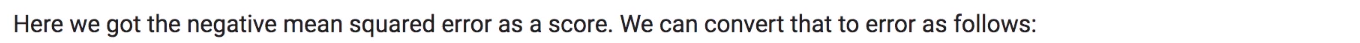

In [14]:
lin_reg_mse = -lin_reg_score

print(f'MSE of linear regression model on the test set:\n'
     f'{lin_reg_mse.mean():.3f} +/- {lin_reg_mse.std():.3f}')

MSE of linear regression model on the test set:
0.529 +/- 0.022


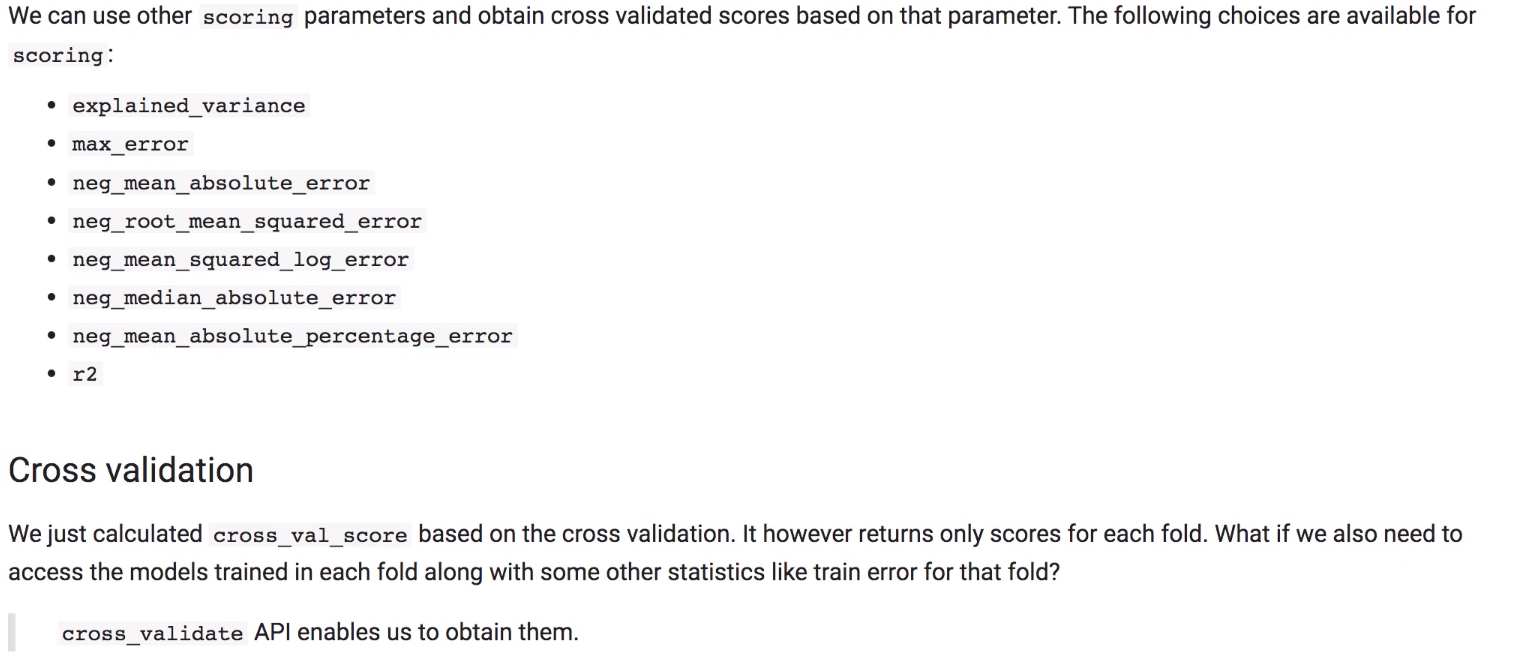

In [15]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    train_features,
                                    train_labels,
                                    cv=shuffle_split_cv,
                                    scoring='neg_mean_squared_error',
                                    return_train_score=True,
                                    return_estimator=True
                                   )

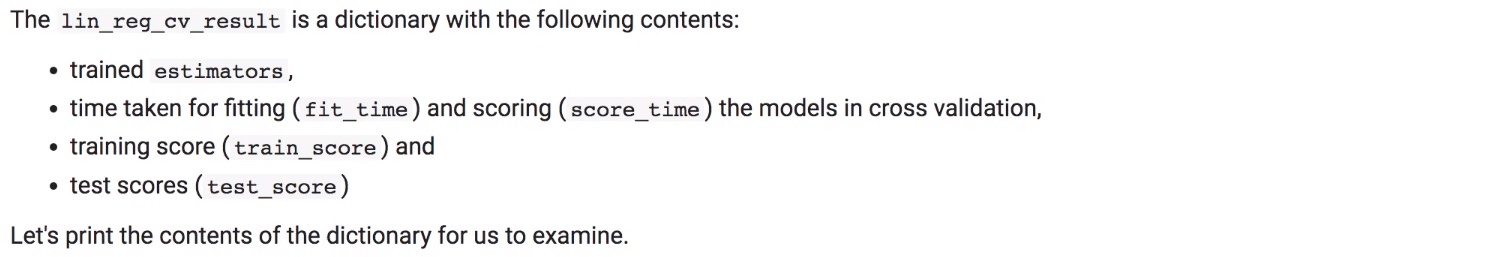

In [16]:
lin_reg_cv_results

{'fit_time': array([0.01099753, 0.00798678, 0.00799966, 0.00699925, 0.00700259,
        0.00700021, 0.0069952 , 0.00700307, 0.00699687, 0.0059998 ]),
 'score_time': array([0.00200081, 0.00199962, 0.00199962, 0.00200033, 0.00199699,
        0.00100064, 0.00200057, 0.00199914, 0.002002  , 0.00200224]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

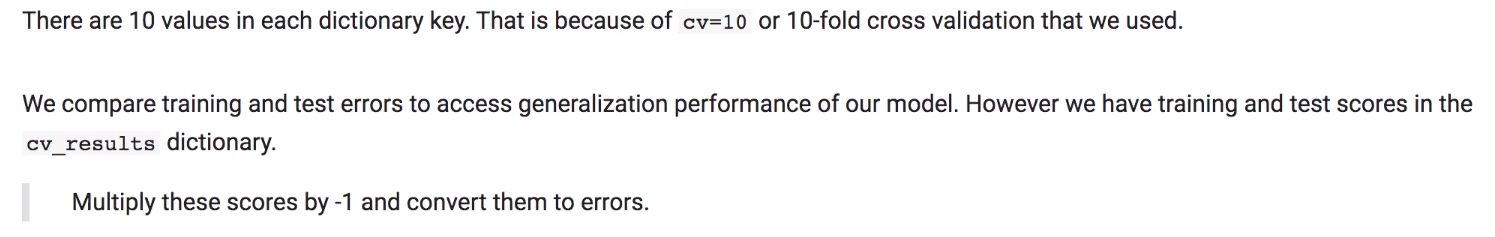

In [17]:
train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']

print(f'Mean squared error of linear regression model on the train set:\n'
     f'{train_error.mean():.3f} +/- {train_error.std():03f}')
print(f'Mean squared error of linear regression model on the test set:\n'
     f'{test_error.mean():.3f} +/- {test_error.std():03f}')

Mean squared error of linear regression model on the train set:
0.519 +/- 0.005552
Mean squared error of linear regression model on the test set:
0.529 +/- 0.022233


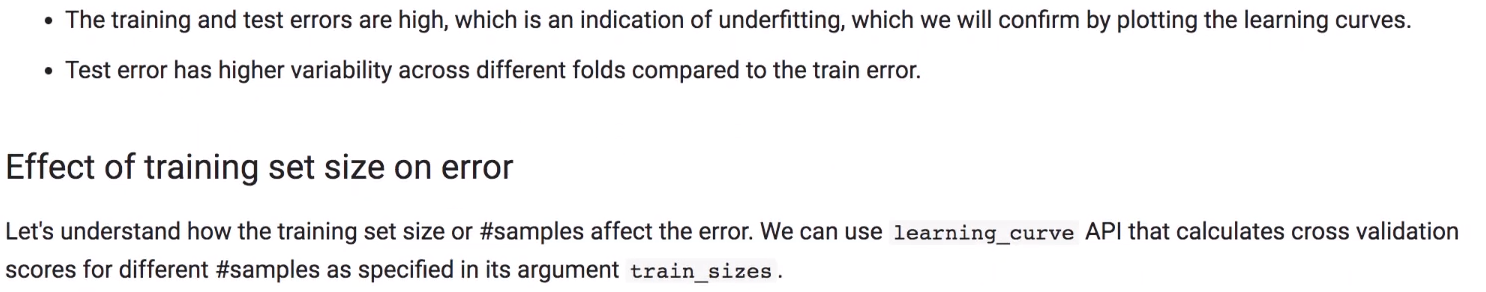

In [18]:
#@title [Plot Learning curves]

def plot_learning_curve(train_sizes, train_scores, test_scores):
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color='r'
    )
    
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color='g'
    )
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Score')
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.legend(loc='best')
    

def plot_scalability_curve(train_sizes, fit_times):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    plt.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,        
    )
    plt.plot(train_sizes, fit_times_mean, "o-")
    plt.xlabel('Training examples')
    plt.ylabel('Fit time')
    plt.title('Scalability of the model')


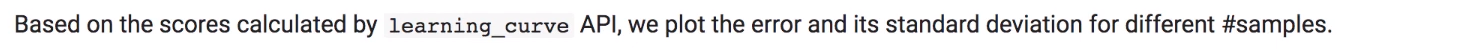

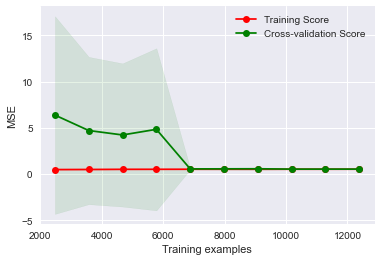

In [19]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                                    lin_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, 
                                                                    scoring='neg_mean_squared_error', n_jobs=-1,
                                                                    return_times=True, train_sizes=np.linspace(0.2, 1.0, 10)
                                                                )

plot_learning_curve(train_sizes, train_scores, test_scores)

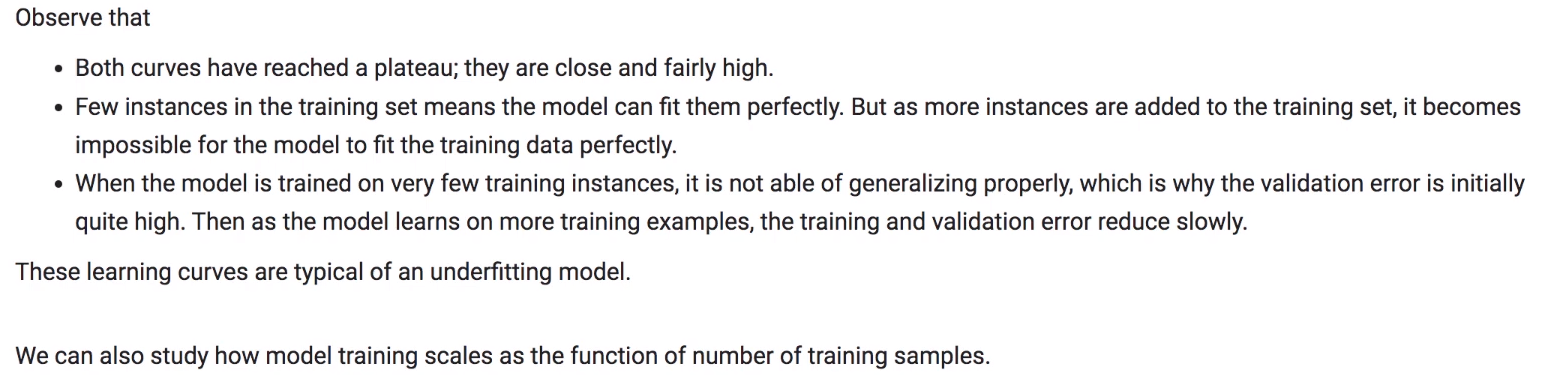

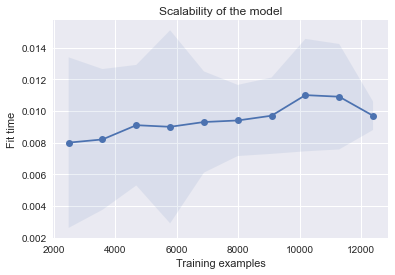

In [20]:
plot_scalability_curve(train_sizes, fit_times)

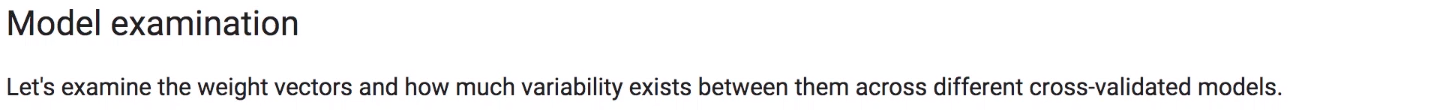

In [21]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

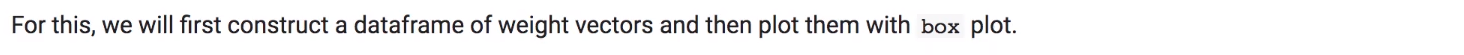

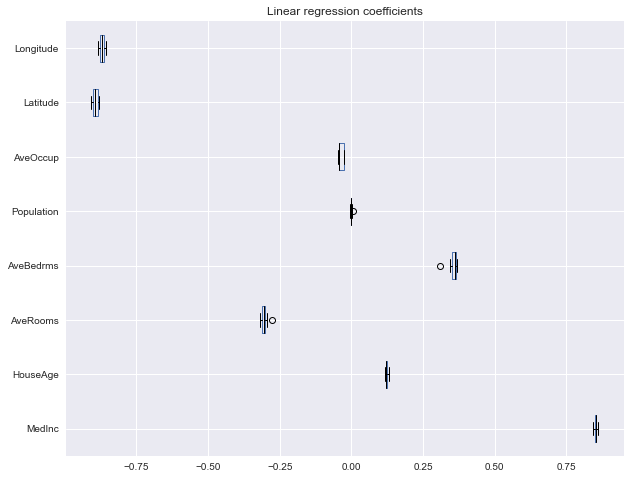

In [22]:
coefs = [est[-1].coef_ for est in lin_reg_cv_results['estimator']]
weights_df = pd.DataFrame(coefs, columns=feature_names)

color = {'whiskers': 'black', 'medians': 'black', 'caps': 'black'}
weights_df.plot.box(color=color, vert=False, figsize=(10,8))
_ = plt.title('Linear regression coefficients')
# weights_df

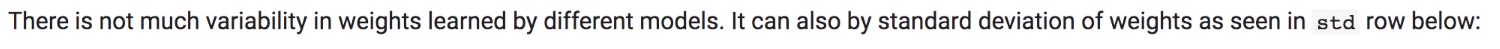

In [23]:
weights_df.describe()

MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
count  10.000000  10.000000  10.000000  10.000000   10.000000  10.000000   
mean    0.852153   0.122770  -0.304384   0.353528   -0.001576  -0.037059   
std     0.005763   0.004312   0.010998   0.018044    0.003254   0.008582   
min     0.843517   0.117394  -0.318971   0.307474   -0.005787  -0.047584   
25%     0.848871   0.119895  -0.310778   0.349715   -0.002688  -0.042486   
50%     0.852711   0.121592  -0.305795   0.360139   -0.002063  -0.042325   
75%     0.854743   0.125520  -0.302980   0.364646   -0.000350  -0.027562   
max     0.861659   0.130560  -0.278426   0.367952    0.005297  -0.026331   

        Latitude  Longitude  
count  10.000000  10.000000  
mean   -0.894011  -0.869753  
std     0.009975   0.009097  
min    -0.908058  -0.884206  
25%    -0.901411  -0.876542  
50%    -0.895370  -0.869631  
75%    -0.883967  -0.862110  
max    -0.881884  -0.857844

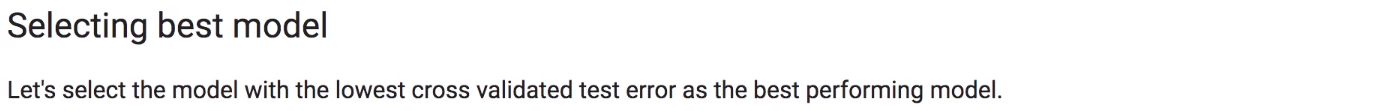

In [50]:
# Let's find out the best model that resulted in the least test error
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

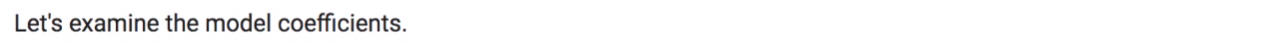

In [51]:
print('Intercept (w_0): ', selected_model['lin_reg'].intercept_)
print('Coefficients (w_1, ..., w_m): ', selected_model['lin_reg'].coef_)

Intercept (w_0):  2.0779898917958657
Coefficients (w_1, ..., w_m):  [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


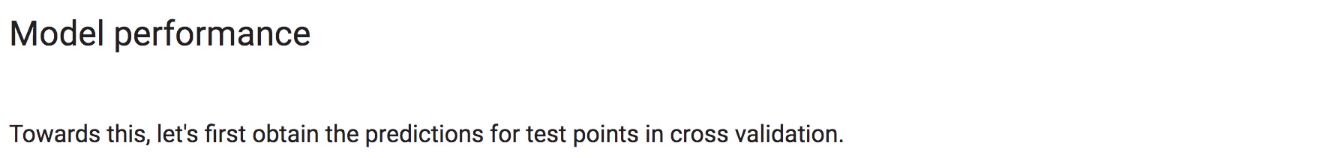

In [96]:
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

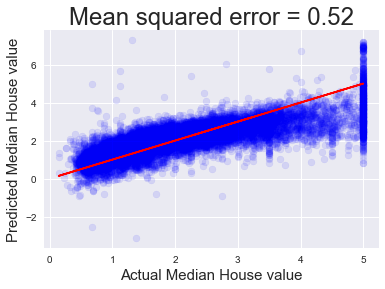

In [112]:
mse_cv = mean_squared_error(train_labels, cv_predictions)

plt.scatter(train_labels, cv_predictions, color='blue', alpha=0.1)
plt.plot(train_labels, train_labels, 'r-')
plt.title(f'Mean squared error = {mse_cv:.2f}', size=24)
plt.xlabel('Actual Median House value', size=15)
plt.ylabel('Predicted Median House value', size=15)
plt.show()

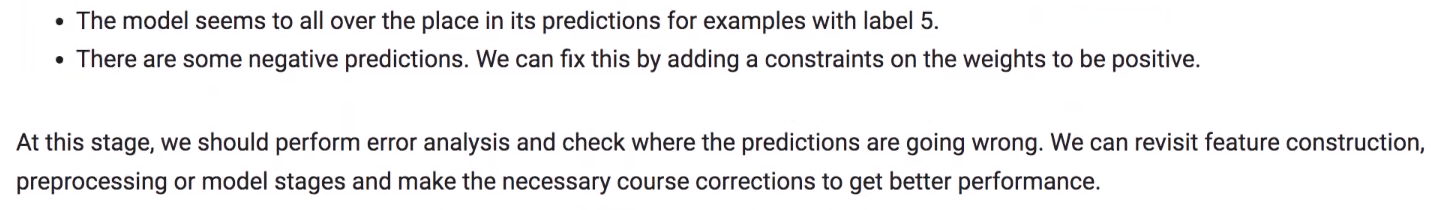
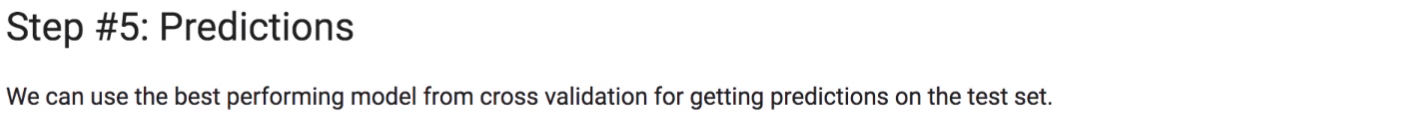

In [58]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

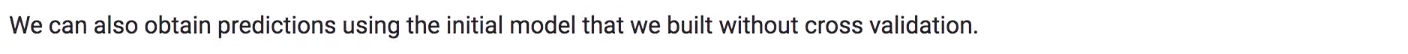

In [59]:
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

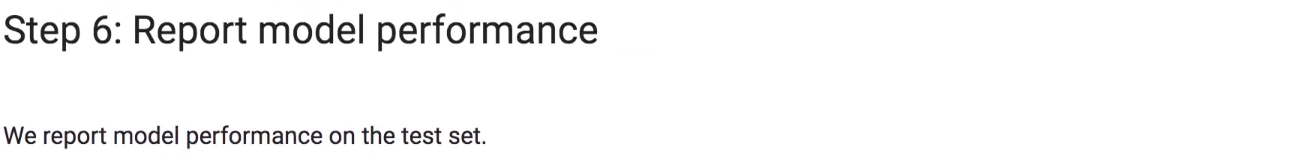

In [61]:
score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)\

print('R2 score for the model obtained via cross validation: ', score_cv)
print('R2 score for the model without cv: ', score)

R2 score for the model obtained via cross validation:  0.5923577635319088
R2 score for the model without cv:  0.5910509795491352


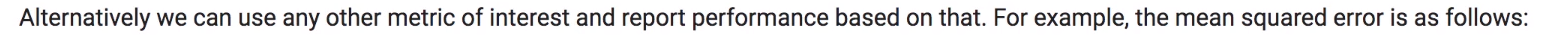

In [62]:
mse = mean_squared_error(test_labels, test_predictions)
mse_cv = mean_squared_error(test_labels, test_predictions_cv)

print('MSE for the model obtained via cross validation: ', mse_cv)
print('MSE for the model without cv: ', mse)

MSE for the model obtained via cross validation:  0.5393995876218523
MSE for the model without cv:  0.5411287478470688


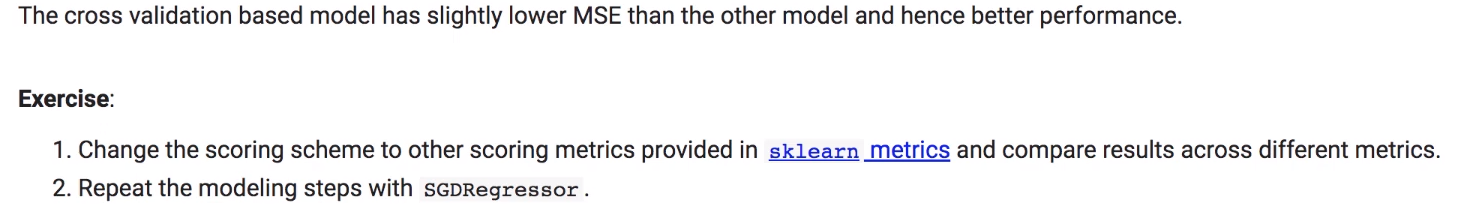